<a href="https://colab.research.google.com/github/Subiono2021/Filsafat-Matematika-dan-Ilmu/blob/main/AlgoritmaShor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

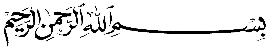

</center>

<center>
<p><h2>
Pemfaktoran bilangan bulat menggunakan Algoritma Shor dan implementasinya dalam Qiskit
</h2>
</p>
<b>Subiono</b><br>
<b>Departemen Matematika, Institut Teknologi Sepuluh Nopember</b><br>
<b>subiono@its.ac.id</b><br>
</b>11 April  2027</b></center
</center>
<p class="noindent">Copyright &copy; 2027 by the author Subiono.</p>

<p align="justify">
Memfaktor suatu bilangan bulat positip $N$ yang sangat besar secara klasik membutuhkan waktu komputasi yang cukup besar. Kita mengenal dalam sekolah dasar dan menengah untuk memfaktorkan suatu bilangan bulat digunakan cara coba-coba, yaitu yang dikenal dengan cara pohon faktor. Hal ini tentunya tidak sangat mendidik sebab caranya coba-coba. Misalnya kita mempunyai bilangan bulat $N=9711=117\times 83=p\times q$. Untuk menemukan $p$ dan $q$ dengan cara pohon faktor suatu pekerjaan yang tidak mudah dilakukan. Tulisan ini bertujuan memberikan suatu cara memfaktorkan  sebarang bilangan bulat $N$ yang dikenal dengan nama <b>Algoritma Shor</b>. Komputasi Kuantum dari algoritma ini kita implementasikan dalam Qiskit. Pembaca bisa mengikuti paper "<a href="https://arxiv.org/abs/quant-ph/0205095">Circuit for Shor's algorithm using 2n+3 qubits</a>", yang membahas tentang Algoritma Shor. Ide dasarnya menggunakan bilangan bulat modulo $N$ dan menganalisa perilakunya pada grup unit $\mathbb{U}(N)$, yaitu himpunan bilangan bulat modulo $N$ yang semua elemen-elemennya mempunyai invers terhadap perkalian. Tentunya hal ini di Departemen Matematika-ITS materi ini telah diberikan dalam mata kuliah Aljabar I. Tulisannya ini juga diharapkan untuk memeberikan pemahaman yang lebih memdalam dan penggunaan dari bilangan bulat modulo $N$. Selain itu akan menambah bahan kajian Aljabar I dalam kurikulum 2024-2029 Departemen Matematika-ITS.</p>

<h3>
<a href="https://qiskit.org/textbook/ch-algorithms/shor.html">Algoritma Shor</a>
</h3>

<p style='justify'>
Algoritma Shor terkenal dengan pemfaktoran bilangan bulat dalam waktu polinomial. Karena algoritma klasik yang paling terkenal membutuhkan waktu superpolinomial untuk memfaktorkan produk dari dua bilangan prima, kriptosistem yang banyak digunakan, RSA, bergantung pada pemfaktoran yang tidak mungkin untuk bilangan bulat yang cukup besar.
</p>

<p style='justify'>
Dalam bagian ini kita akan fokus pada bagian kuantum dari algoritma Shor, yang sebenarnya memecahkan masalah pencarian periode. Karena masalah pemfaktoran dapat diubah menjadi masalah pencarian periode dalam waktu polinomial, algoritma pencarian periode yang efisien juga dapat digunakan untuk memfaktorkan bilangan bulat secara efisien. Untuk saat ini cukup untuk menunjukkan bahwa jika kita dapat menghitung periode $a^x\bmod N$ secara efisien, maka kita juga dapat memfaktorkannya secara efisien. Disini yang dimaksud periode adalah order dari elemen $a\in\mathbb{U}(N)$ adalah bilangan bulat positip terkecil $x$ yang memenuhi $a^x\equiv 1\mod N$ (lihat di
<a href="https://www.its.ac.id/matematika/aljabar-suatu-pondasi-matematika/"> Aljabar: Suatu Pondasi Matematika, Subiono</a>. Karena pencarian periode merupakan masalah yang layak, pertama-tama kita akan menyelesaikannya, kemudian mendiskusikan bagaimana ini dapat digunakan untuk memfaktorkan di bagian 5.
<br>
<br>
Untuk menjalankan Algoritma Shor dalam Qiskit, kita install beberapa perangkat yang dibutuhkan sebagai berikut:
</p>

In [ ]:
!pip install 'qiskit >= 1'
!pip install qiskit-ibm-runtime
!pip install qiskit[visualization]
!pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src
!pip install qiskit-aer
!pip install qiskit-ibm-provider
!pip install pylatexenc
!pip install tweedledum

Kita bisa melihat versi Qiskit yang digunakan sebagai berikut:

In [ ]:
import qiskit

qiskit.version.get_version_info()

Selanjutnya kita <code>import</code> beberapa perangkat lainnya yang kita butuhkan:

In [ ]:
import numpy as np
from qiskit import *
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram, plot_gate_map
from qiskit.visualization import array_to_latex
from qiskit.quantum_info import Statevector
from numpy import matmul
from numpy import transpose
from numpy import sqrt, pi
from numpy import array
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import QiskitRuntimeService
import matplotlib.pyplot as plt
from math import gcd
from numpy.random import randint
import pandas as pd
from fractions import Fraction
print("Imports Successful")

## 1. Permasalahan: Menemukan Periode

<p style='justify'>
Berikutnya kita bahas fungsi periodik:
$$
f(x) = a^{x} \pmod N.
$$
<b>Pengingat</b>: Modulo & Aritmatika Modular. Operasi modulo (disingkat 'mod') secara sederhana berarti mencari sisa pembagian satu bilangan oleh bilangan lainnya. Contoh:
$$
13 \mod 5 = 2,
$$
sebab $13\div 5 = 2$ dan sisa pembagian $3$, yaitu: $13 = 2\times 5 + 3$. Dalam bahasa Python, operasi modulus digunakan perintah <code>%</code>.
<br>
<br>
Perilaku ini digunakan dalam aritmetika modular, di mana angka "<b>berputar</b>" setelah mencapai nilai tertentu (modulus). Menggunakan aritmetika modular, kita dapat menulis:
$$
13 \equiv 3 \pmod 5.
$$
Perhatikan bahwa di sini $\pmod 5$ berlaku untuk seluruh persamaan (karena berada dalam tanda kurung), berbeda dengan persamaan di atas di mana $\mod 5$ hanya berlaku untuk ruas kiri persamaan. Disini $a$ dan $N$ adalah bilangan bulat positif, $a$ lebih kecil dari $N$, dan keduanya tidak memiliki faktor persekutuan. Periode, atau orde ($r$), adalah bilangan bulat positip terkecil (tidak nol) sedemikian sehingga:
$$
a^r \mod N = 1.
$$
<b>Contoh</b>: Untuk $N=35$ kita mempunyai himpunan semua bilangan bulat $\mod 35$ adalah
$$
\mathbb{Z}_{35}=\{0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34\}
$$
dan grup unit terhadap operasi perkalian dari $N=35$ adalah
$$
\mathbb{U}(35)=\{1,2,3,4,6,8,9,11,12,13,16,17,18,19,22,23,24,26,27,29,31,32,33,
 34\}
$$
Banyaknya elemen-elemen di $\mathbb{U}(35)$ dinamakan bilangan Euler dinotasikan sebagai $\varphi(35)=24$ dan memenuhi
$$
a^{\varphi(35)}=a^{24} = 1, \forall a\in \mathbb{U}(35).
$$
Bilangan bulat positip terkecil $r$ yang memenuhi
$$
a^r \mod 35 = 1, \forall a\in\mathbb{U}(35)
$$
merupakan faktor-faktor dari $\varphi(35)=24$ yang selain $24$ yaitu:
$$
1,2,3,4,6,12.
$$
Untuk $r=1$ jelas hanya ada satu elemen $a=1$. Untuk $r=2$ didapat $a=6,9,34$.
Untuk $r=3$ didapat $a=11, 16$. Untuk $r=4$ didapat $a=8, 13, 22, 27$.
Untuk $r=6$ didapat $a=4, 9, 19, 24, 26, 31$ dan untuk $r=12$ didapat $2, 3, 12, 17, 18, 23, 32, 33$.
<br>
<br>
Program berikut menampilkan grafik fungsi periodik untuk $a\in\mathbb{U}(35)$.
</p>

In [ ]:
N = 35
a = 12 # Anda bisa ganti dengan nilai a yang lain di U(35)

# Hitung data pemetaan
xvals = np.arange(35)
yvals = [np.mod(a**x, N) for x in xvals]

# Gunakan Matplotlib untuk menampilkannya dengan baik.
fig, ax = plt.subplots()
ax.plot(xvals, yvals, linewidth=1, linestyle='dotted', marker='x')
ax.set(xlabel='$x$', ylabel=r'${a}^x$ mod ${N}$',
       title="Contoh Fungsi Periodik dalam Algoritma Shor")
try: # plot r pada grafik
    r = yvals[1:].index(1) + 1
    plt.annotate('', xy=(0,1), xytext=(r,1),
                 arrowprops=dict(arrowstyle='<->'))
    plt.annotate(f'$r={r}$', xy=(r/3,1.5))
except ValueError:
    print('Tidak dapat menemukan periode, periksa a < N dan tidak memiliki faktor persekutuan.')

## 2. Penyelesaian

<p style='justify'>
Penyelesaian Shor adalah dengan menggunakan <b>estimasi fase kuantum</b> pada operator unitari.
$$
U\vert y\rangle = \vert ay \mod N\rangle.
$$
Untuk melihat bagaimana ini membantu, kita cari tahu seperti apa eigenstate dari $U$. Jika kita mulai dalam keadaan $|1⟩$, kita dapat melihat bahwa setiap penerapan $U$ yang berurutan akan mengalikan keadaan register kita dengan $a \pmod N$, dan setelah $r$ penerapan kita akan kembali ke keadaan $|1⟩$. Sebagai contoh untuk $a=12$ dan $N=35$:
\begin{eqnarray*}
U\vert 1\rangle &=& \vert 12\rangle\\
U^2\vert 1\rangle &=& \vert 4\rangle\\
U^3\vert 1\rangle &=& \vert 13\rangle\\
&\vdots&\\
U^{(r-1)}\vert 1\rangle &=& \vert 3\rangle\\
U^r\vert 1\rangle &=& \vert 1\rangle.
\end{eqnarray*}
</p>

In [ ]:
ax.set(xlabel='Banyaknya penggunaan $U$',
       ylabel='keadaan akhir register',
       title="Efek Penggunaan Berurutan $U$")
fig

<p style='justify'>
Dengan demikian, superposisi keadaan-keadaan dalam siklus ini ($|u_0⟩$) akan merupakan keadaan-eigen (<em>eigenstate</em>) dari $U$:
$$
\vert u_0\rangle = \frac{1}{\sqrt{r}}\sum_{k=0}^{r-1}\vert a^k\!\!\!\mod N\rangle.
$$
Contoh, untuk $a=12$ dan $N=35$, kita mempunyai
\begin{eqnarray*}
\vert u_0\rangle &=& \frac{1}{\sqrt{12}}\left(\vert 1\rangle + \vert 12\rangle+\vert 4\rangle + \vert 13\rangle + \vert 16\rangle + \vert 17\rangle + \vert 29\rangle + \vert 33\rangle + \vert 11\rangle + \vert 27\rangle + \vert 9\rangle + \vert 3\rangle\right)\\
U\vert u_0\rangle &=& \frac{1}{\sqrt{12}}\left(U\vert 1\rangle + U\vert 12\rangle+U\vert 4\rangle + U\vert 13\rangle + U\vert 16\rangle + U\vert 17\rangle + U\vert 29\rangle + U\vert 33\rangle + U\vert 11\rangle\right.\\
 &&\qquad \left.  +\ U\vert 27\rangle + U\vert 9\rangle + U\vert 3\rangle \right)\\
 &=& \frac{1}{\sqrt{12}}\left(\vert 12\rangle+\vert 4\rangle + \vert 13\rangle + \vert 16\rangle + \vert 17\rangle + \vert 29\rangle + \vert 33\rangle + \vert 11\rangle + \vert 27\rangle + \vert 9\rangle + \vert 3\rangle + \vert 1\rangle\right)\\
 &=& \vert U_0\rangle.
\end{eqnarray*}
Keadaan-eigen ini memiliki nilai eigen sebesar $1$, yang tidak terlalu menarik. Keadaan-eigen yang lebih menarik adalah satu di mana fase berbeda untuk setiap basis komputasi tersebut. Secara spesifik, kita lihat kasus di mana fase dari keadaan ke-$k$ sebanding dengan $k$.
\begin{eqnarray*}
\vert u_1\rangle &=& \frac{1}{\sqrt{r}}\sum_{k=0}^{r-1}e^{-\frac{2\pi i k}{r}}\vert a^k\!\!\!\mod N\rangle\\
U\vert u_1\rangle &=& e^{\frac{2\pi i}{r}}\vert u_1\rangle.
\end{eqnarray*}
Contoh, untuk $a=12$ dan $N=35$ kita mempunyai
\begin{eqnarray*}
\vert u_1\rangle &=& \frac{1}{\sqrt{12}}\left(\vert 1\rangle + e^{-\frac{2\pi i}{12}}\vert 12\rangle+ e^{-\frac{4\pi i}{12}}\vert 4\rangle + e^{-\frac{6\pi i}{12}}\vert 13\rangle + e^{-\frac{8\pi i}{12}}\vert 16\rangle + e^{-\frac{10\pi i}{12}}\vert 17\rangle + e^{-\frac{12\pi i}{12}}\vert 29\rangle\right.\\
&&\qquad +\ \left. e^{-\frac{14\pi i}{12}}\vert 33\rangle + e^{-\frac{16\pi i}{12}}\vert 11\rangle + e^{-\frac{18\pi i}{12}}\vert 27\rangle + e^{-\frac{20\pi i}{12}}\vert 9\rangle + e^{-\frac{22\pi i}{12}}\vert 3\rangle\right)\\
U\vert u_1\rangle &=& \frac{1}{\sqrt{12}}\left(\vert 12\rangle + e^{-\frac{2\pi i}{12}}\vert 4\rangle+ e^{-\frac{4\pi i}{12}}\vert 13\rangle + e^{-\frac{6\pi i}{12}}\vert 16\rangle + e^{-\frac{8\pi i}{12}}\vert 17\rangle + e^{-\frac{10\pi i}{12}}\vert 29\rangle + e^{-\frac{12\pi i}{12}}\vert 33\rangle\right.\\
&&\qquad +\ \left. e^{-\frac{14\pi i}{12}}\vert 11\rangle + e^{-\frac{16\pi i}{12}}\vert 27\rangle + e^{-\frac{18\pi i}{12}}\vert 9\rangle + e^{-\frac{20\pi i}{12}}\vert 3\rangle + e^{-\frac{22\pi i}{12}}\vert 1\rangle\right)\\
&=& e^{\frac{2\pi i}{12}}\frac{1}{\sqrt{12}}\left(e^{-\frac{2\pi i}{12}}\vert 12\rangle + e^{-\frac{4\pi i}{12}}\vert 4\rangle+ e^{-\frac{6\pi i}{12}}\vert 13\rangle + e^{-\frac{8\pi i}{12}}\vert 16\rangle + e^{-\frac{10\pi i}{12}}\vert 17\rangle + e^{-\frac{12\pi i}{12}}\vert 29\rangle + e^{-\frac{14\pi i}{12}}\vert 33\rangle\right.\\
&&\qquad +\ \left. e^{-\frac{16\pi i}{12}}\vert 11\rangle + e^{-\frac{18\pi i}{12}}\vert 27\rangle + e^{-\frac{20\pi i}{12}}\vert 9\rangle + e^{-\frac{22\pi i}{12}}\vert 3\rangle + e^{-\frac{24\pi i}{12}}\vert 1\rangle\right)\\
 &=& e^{\frac{2\pi i}{12}}\vert U_1\rangle.
\end{eqnarray*}
</p>

In [ ]:
def c_amod15(a, power):
    """Controlled multiplication by a mod 15"""
    if a not in [2,4,7,8,11,13]:
        raise ValueError("'a' must be 2,4,7,8,11 or 13")
    U = QuantumCircuit(4)
    for _iteration in range(power):
        if a in [2,13]:
            U.swap(2,3)
            U.swap(1,2)
            U.swap(0,1)
        if a in [7,8]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
        if a in [4, 11]:
            U.swap(1,3)
            U.swap(0,2)
        if a in [7,11,13]:
            for q in range(4):
                U.x(q)
    U = U.to_gate()
    U.name = f"{a}^{power} mod 15"
    return U.control()

In [ ]:
c_amod15(a=11,power=123)

aaa

In [ ]:
# Specify variables
N_COUNT = 8  # number of counting qubits
a = 7

<p style="justify">
Kita juga mengimpor sirkuit untuk <b>QFT</b> (Quantum Fourier Transform). Anda dapat membaca lebih lanjut tentang QFT di bab <a href="https://qiskit.org/textbook/ch-algorithms/quantum-fourier-transform.html#generalqft">transformasi Fourier kuantum</a>:
</p>

In [ ]:
def qft_dagger(n):
    """n-qubit QFTdagger the first n qubits in circ"""
    qc = QuantumCircuit(n)
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-np.pi/float(2**(j-m)), m, j)
        qc.h(j)
    qc.name = "QFT†"
    return qc

Dengan blok bangunan ini kita dapat dengan mudah membuat rangkaian untuk algoritma Shor:

In [ ]:
# Create QuantumCircuit with N_COUNT counting qubits
# plus 4 qubits for U to act on
qc = QuantumCircuit(N_COUNT + 4, N_COUNT)

# Initialize counting qubits
# in state |+>
for q in range(N_COUNT):
    qc.h(q)

# And auxiliary register in state |1>
qc.x(N_COUNT)

# Do controlled-U operations
for q in range(N_COUNT):
    qc.append(c_amod15(a, 2**q),
             [q] + [i+N_COUNT for i in range(4)])

# Do inverse-QFT
qc.append(qft_dagger(N_COUNT), range(N_COUNT))

# Measure circuit
qc.measure(range(N_COUNT), range(N_COUNT))
qc.draw("mpl",fold=-1)  # -1 means 'do not fold'

Kita lihat hasil apa yang kita ukur:

In [ ]:
# Impor yang diperlukan

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.result import marginal_distribution
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=2)
isa_qc = pm.run(qc)

qobj = assemble(isa_qc)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)